In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
# importing boston dataset
boston=load_boston()
type(boston)
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
data['Price']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data.count()   # show number of entries

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

# Cleaning Data-Check for missing values

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Visualising Data- Histogram, Distribution and Bar Chart

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

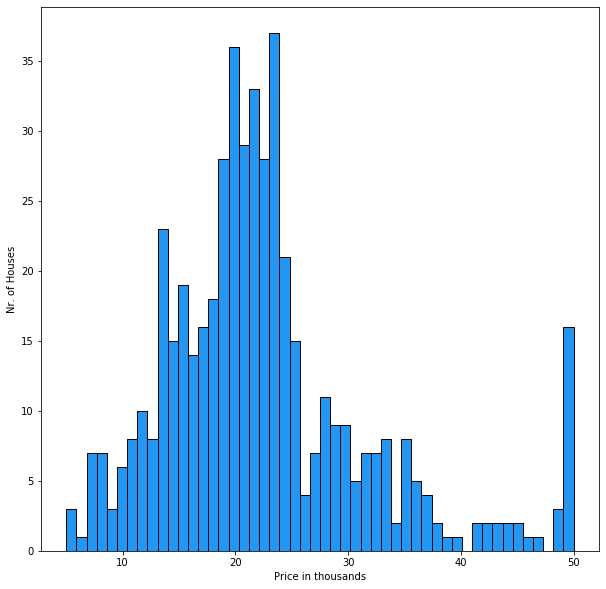

In [8]:
plt.figure(figsize=(10,10))
plt.hist(data['Price'],bins=50,ec='Black',color='#2196f3')
plt.xlabel('Price in thousands')
plt.ylabel('Nr. of Houses')
plt.show()

In [9]:
import seaborn as sb

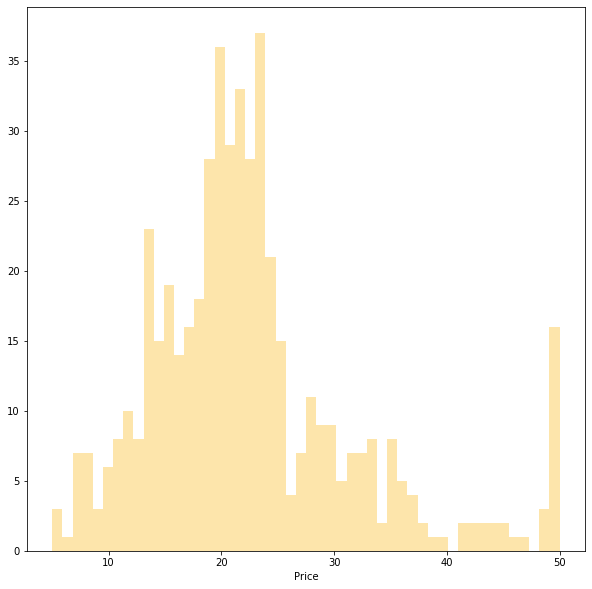

In [10]:
plt.figure(figsize=(10,10))
sb.distplot(data['Price'],bins=50,hist=True,kde=False,color='#fbc02d')
plt.show()

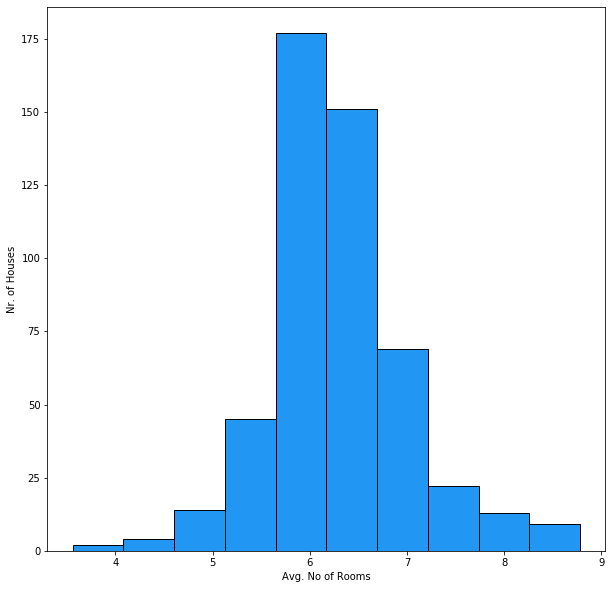

In [11]:
plt.figure(figsize=(10,10))
plt.hist(data['RM'],ec='Black',color='#2196f3')
plt.xlabel('Avg. No of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

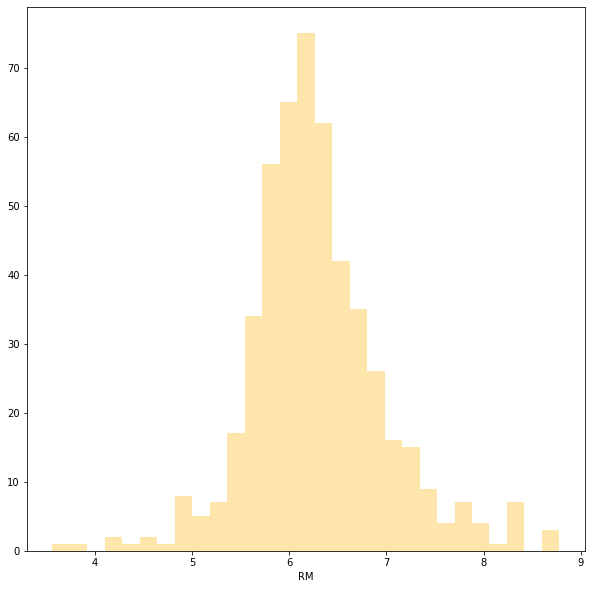

In [12]:
plt.figure(figsize=(10,10))
sb.distplot(data['RM'],hist=True,kde=False,color='#fbc02d')
plt.show()

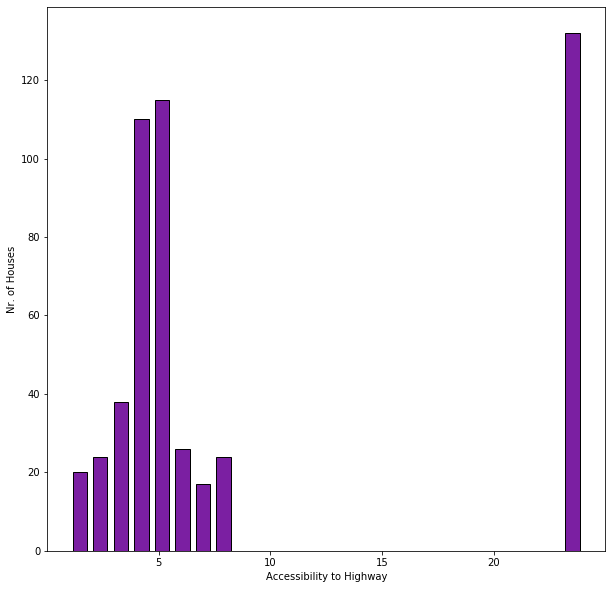

In [13]:
plt.figure(figsize=(10,10))
plt.hist(data['RAD'],bins=25,ec='Black',color='#7b1fa2',rwidth=0.7)
plt.xlabel('Accessibility to Highway')
plt.ylabel('Nr. of Houses')
plt.show()

In [14]:
data['RAD'].value_counts()


24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

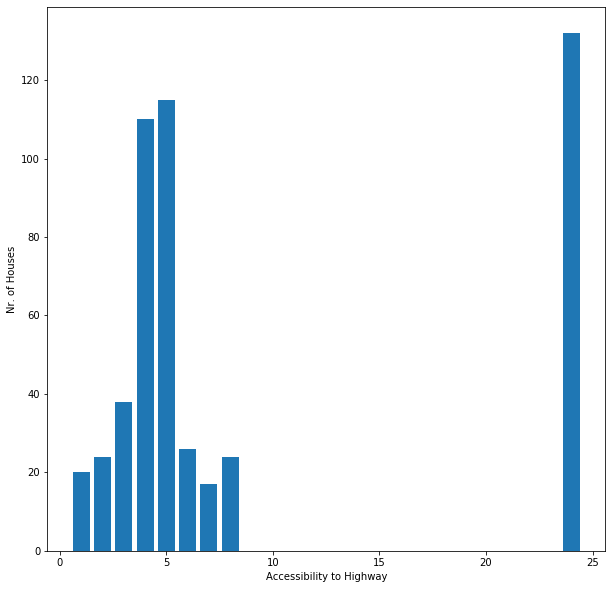

In [15]:
frequency=data['RAD'].value_counts()
#frequency.axes[0]
#frequency.index
plt.figure(figsize=(10,10))
plt.bar(frequency.index,height=frequency)
plt.xlabel('Accessibility to Highway')
plt.ylabel('Nr. of Houses')
plt.show()

In [16]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [17]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
mask=np.zeros_like(data.corr())
triangle=np.triu_indices_from(mask)
mask[triangle]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

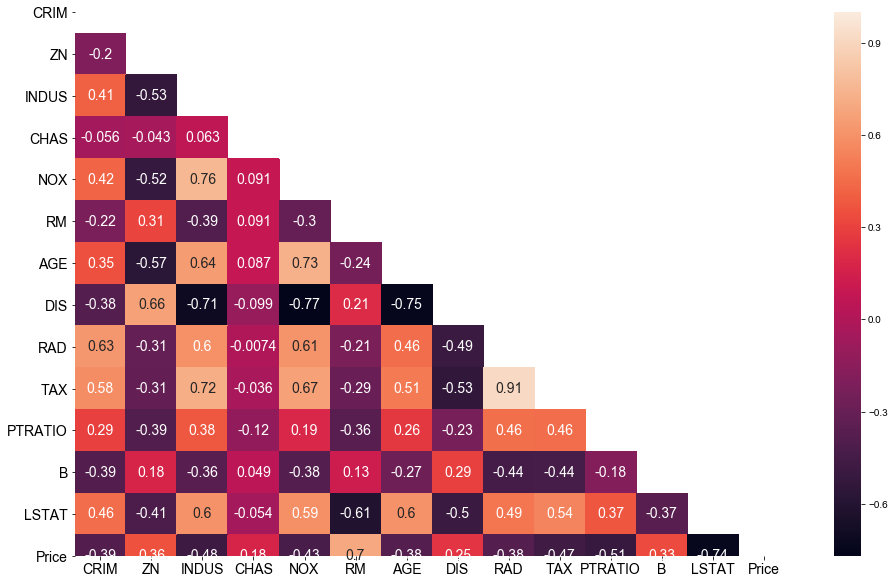

In [19]:
plt.figure(figsize=(16,10))
sb.heatmap(data.corr(),mask=mask,annot=True,annot_kws={'size':14})
sb.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


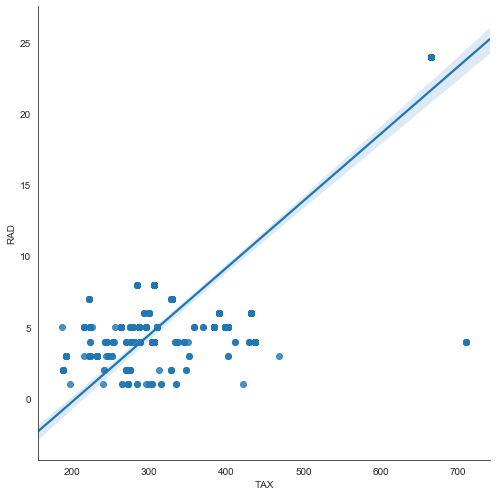

In [20]:
#scatter plot for highest corr. b/w RAD and TAX
sb.lmplot(x='TAX',y='RAD',data=data,size=7)
plt.show()

- the above scatter plot doesnot indicates that there is veru stron relationship between TAX and RAD since RAD is not a countinous variable so corr and regression is not the best way to approch this problem

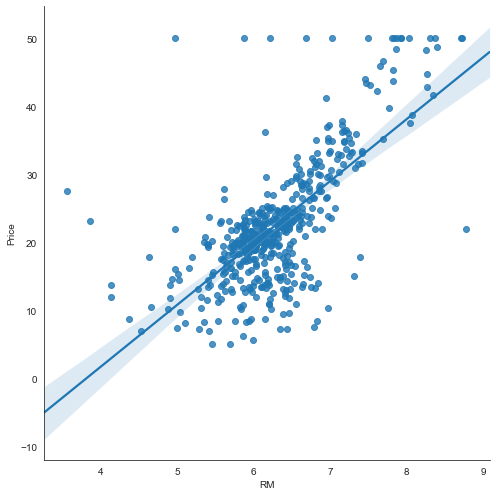

In [21]:
sb.lmplot(x='RM',y='Price',data=data,size=7)
plt.show()

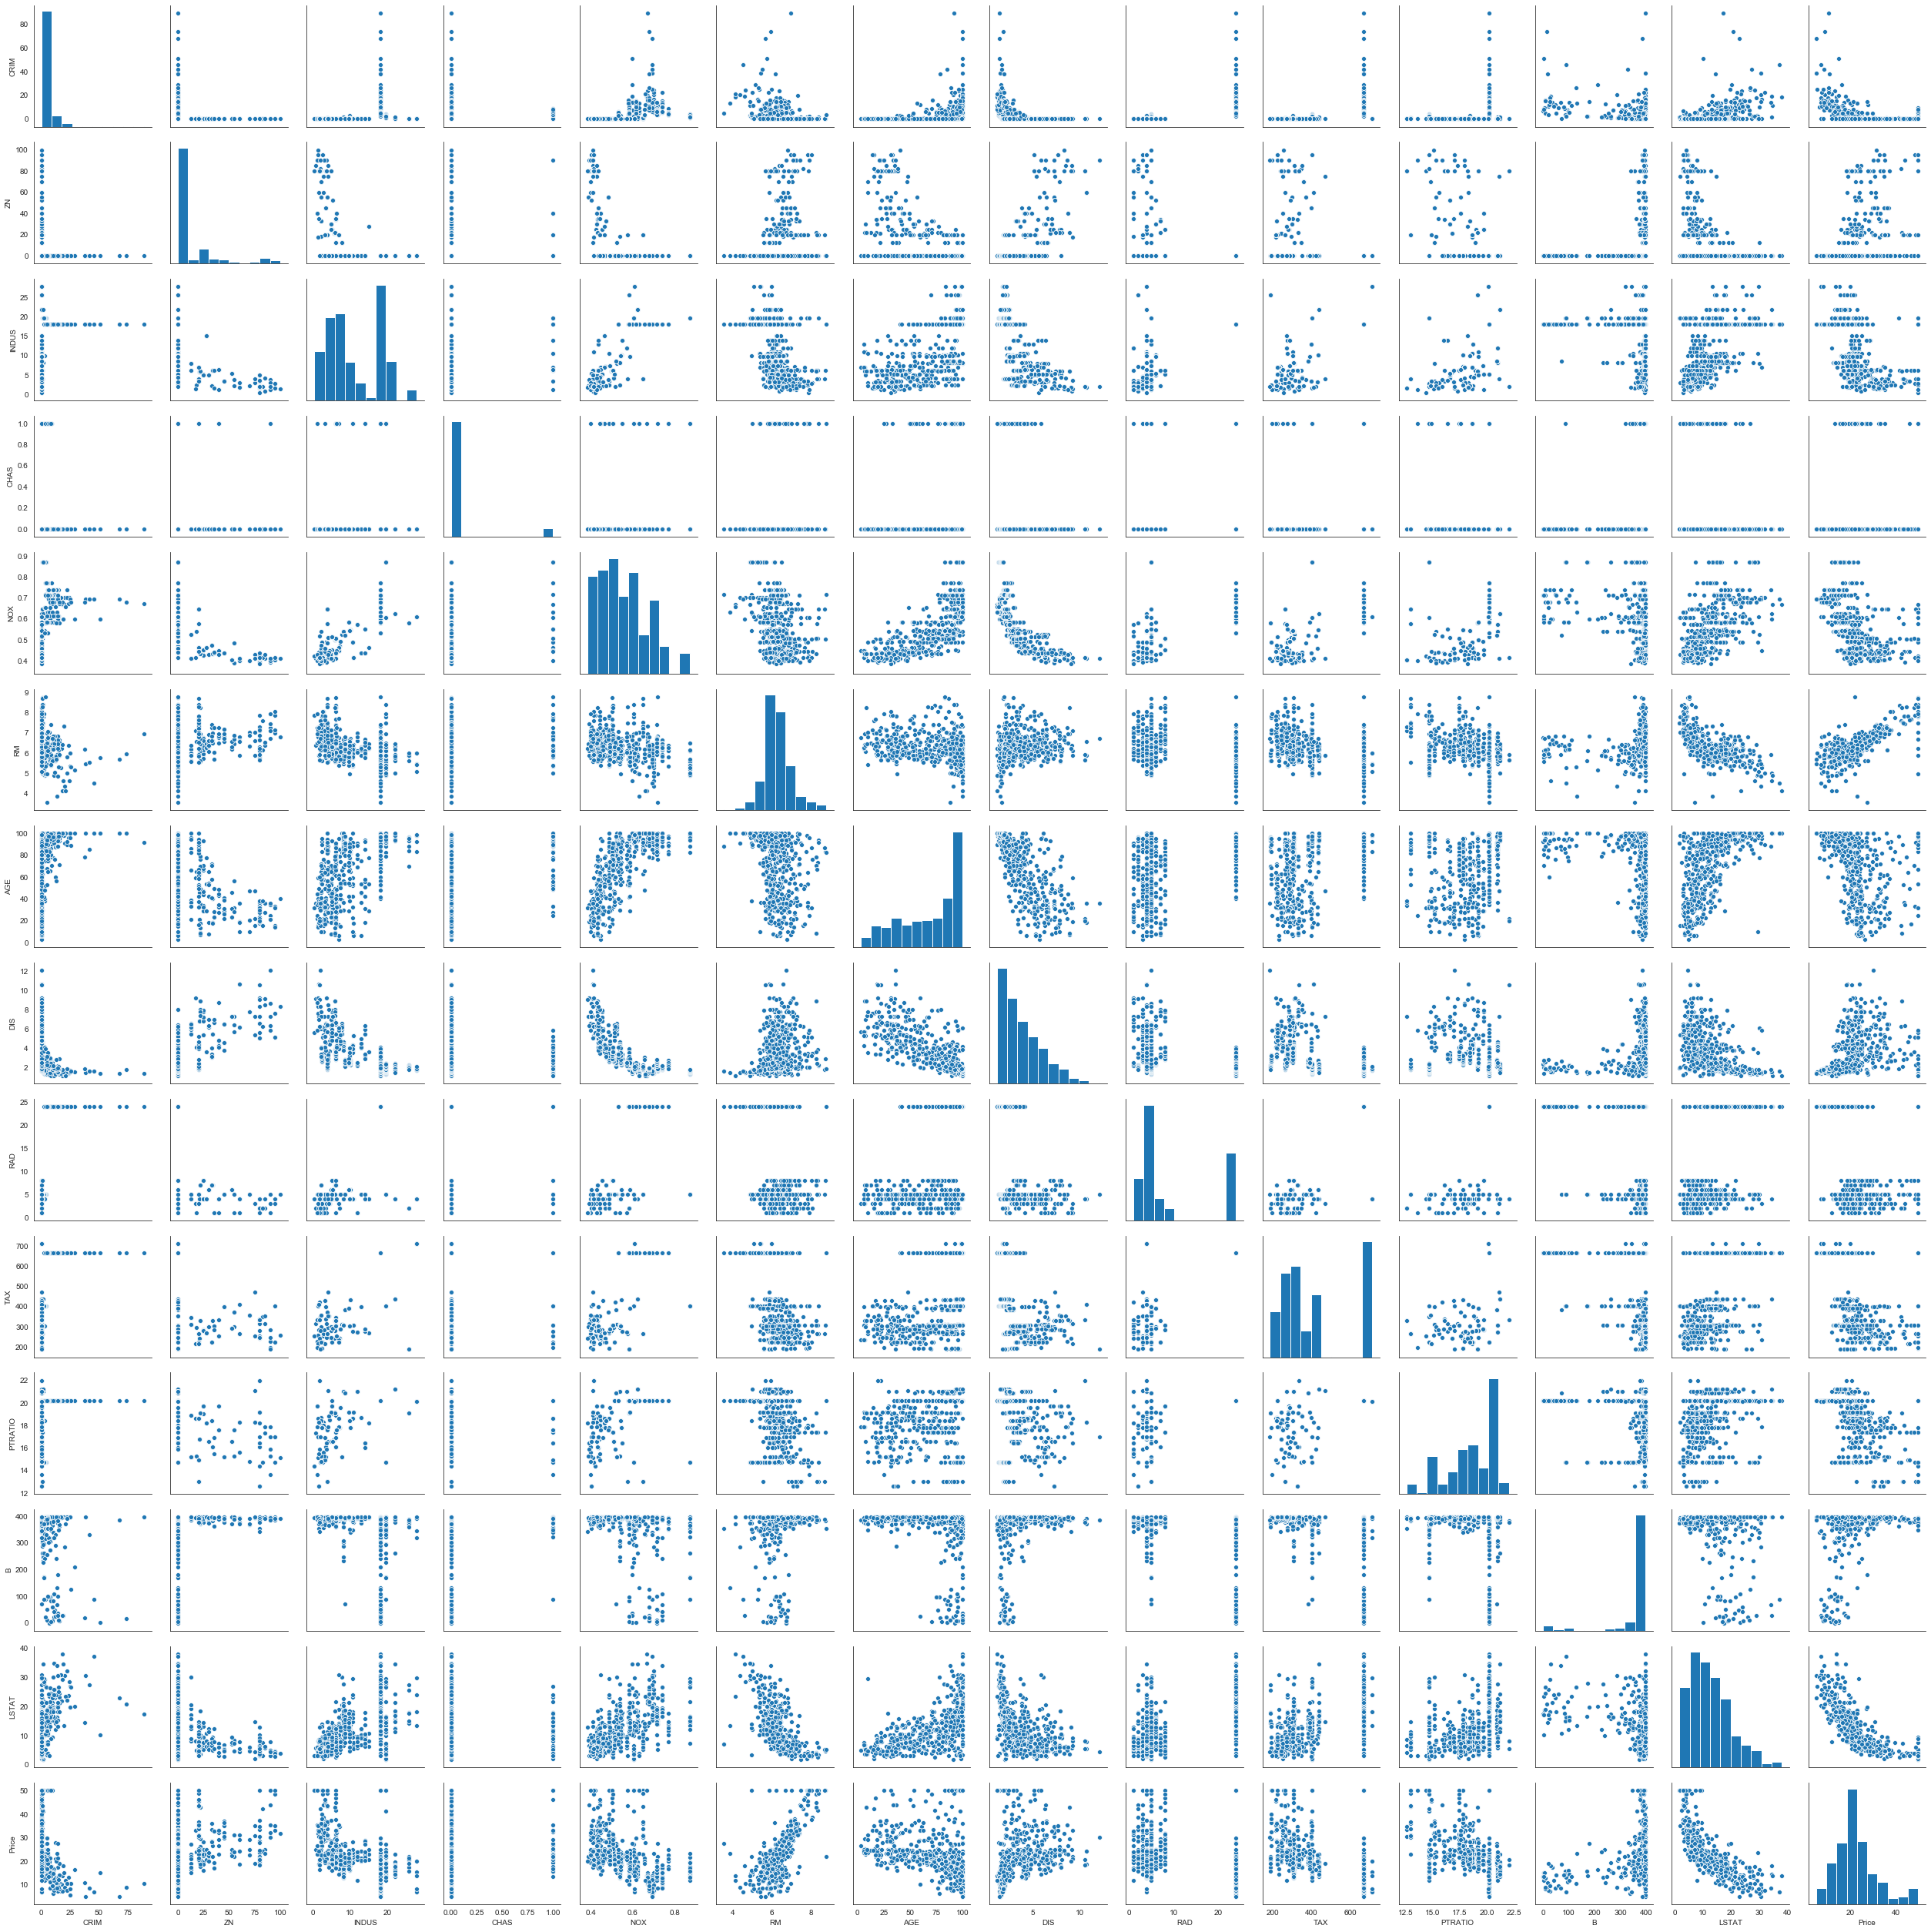

Wall time: 1min 2s


In [22]:
%%time
sb.pairplot(data)
plt.show()

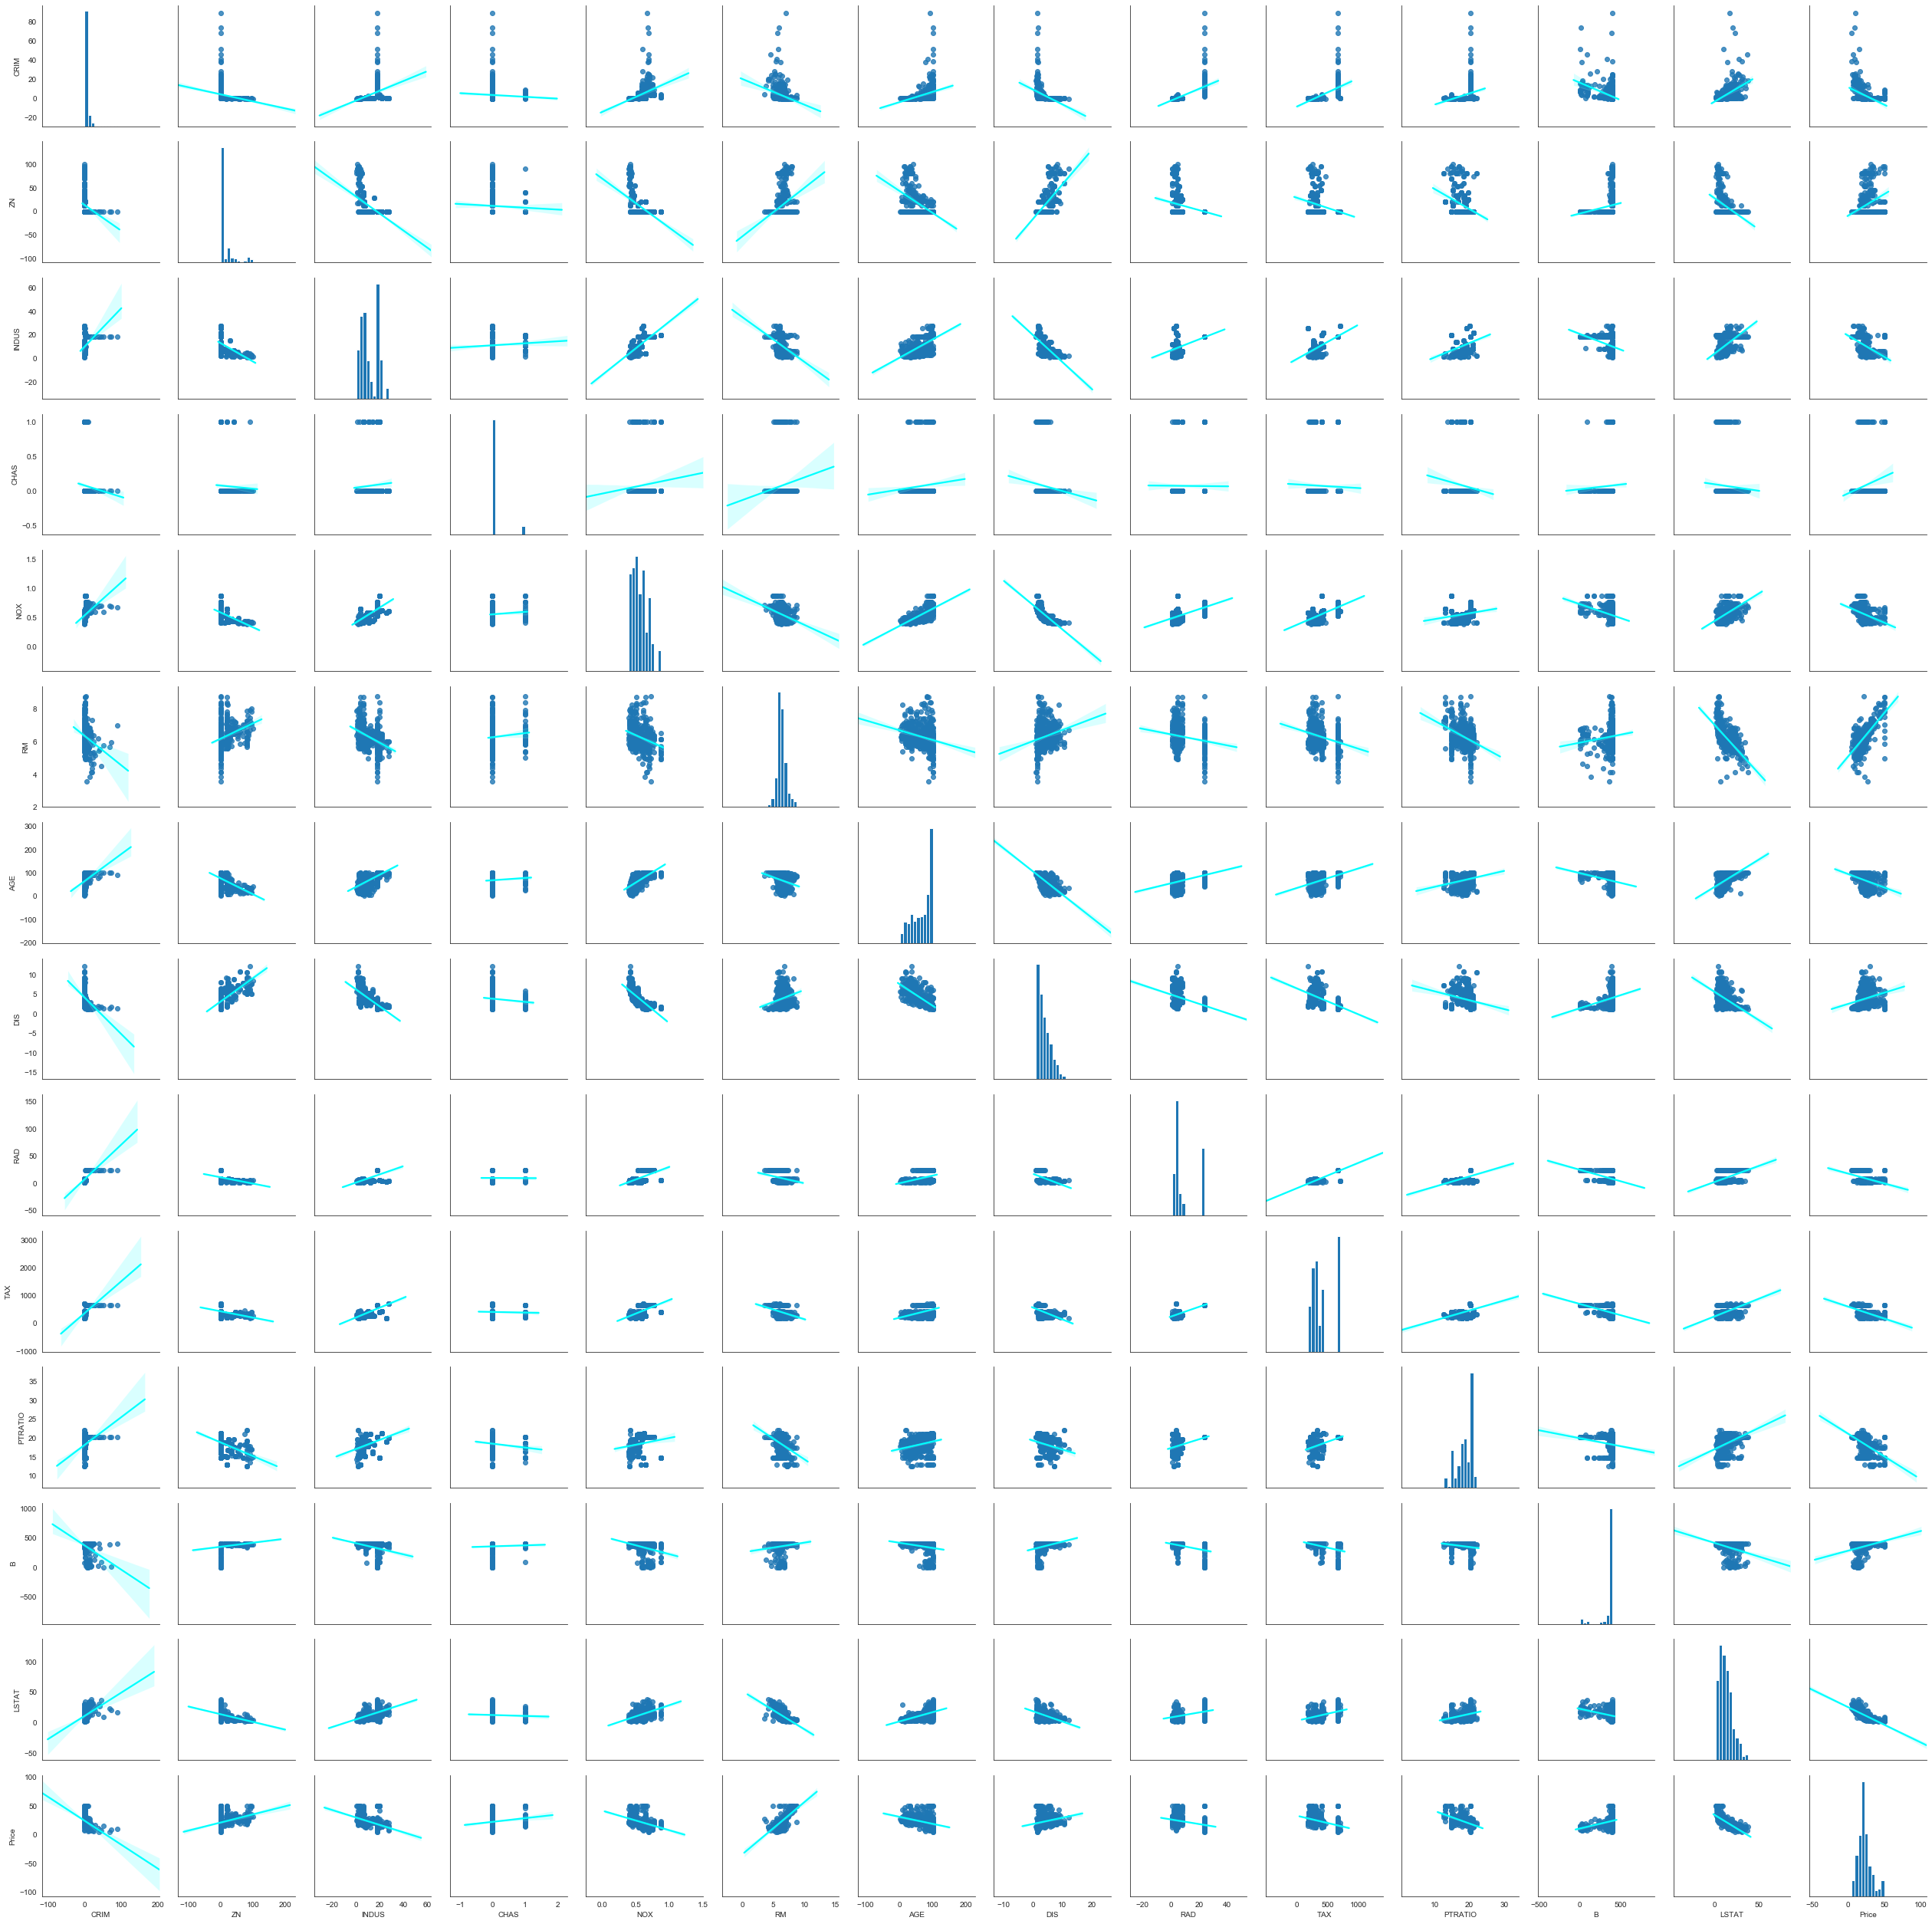

Wall time: 1min 38s


In [23]:
%%time
sb.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training & Test Dataset Split

In [24]:
prices = data['Price']
features = data.drop('Price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices,test_size=0.2, random_state=10)

## Multivariable Regression

In [25]:
regr = LinearRegression()
regr.fit(x_train, y_train)

#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=data.iloc[:,:-1].columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


# Data Transformation

In [26]:
data['Price'].skew()

1.1080984082549072

In [27]:
y_log=np.log(data['Price'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: Price, dtype: float64

In [28]:
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: Price, dtype: float64

In [29]:
y_log.skew()

-0.33032129530987864

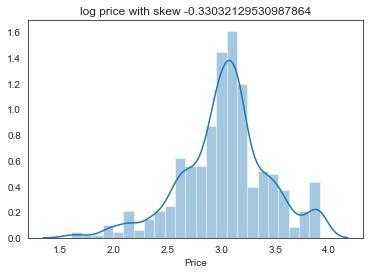

In [30]:
sb.distplot(y_log)
plt.title(f'log price with skew {y_log.skew()}')
plt.show()

## Log price vs price scatter plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


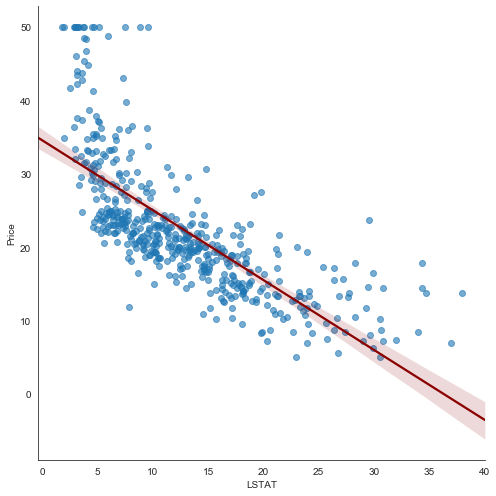

In [31]:
sb.lmplot(x='LSTAT',y='Price',data=data,size=7,scatter_kws={'alpha':0.6},line_kws={'color':'darkred'})
plt.show()

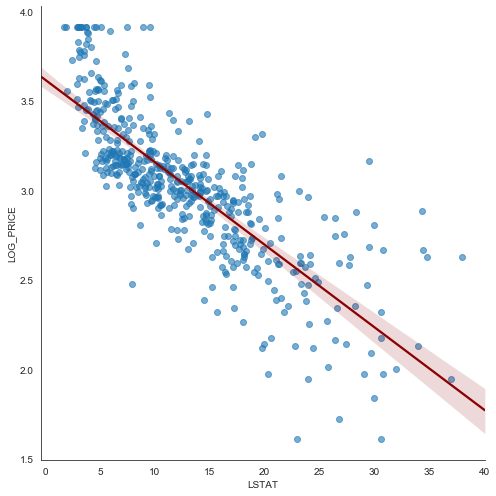

In [32]:
transformed_data=features
transformed_data['LOG_PRICE']=y_log
sb.lmplot(x='LSTAT',y='LOG_PRICE',data=transformed_data,size=7,scatter_kws={'alpha':0.6},line_kws={'color':'darkred'})
plt.show()

## Regression using Log Prices

In [33]:
log_prices = np.log(data['Price'])
features = data.drop('Price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features,log_prices,test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(x_train, y_train)

#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=data.iloc[:,:-1].columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


- So here R^2 value has improved due to transformation after reducing skewness-but interpritation of parameters has changed Eg:-CHAS coef was 1.974515 before but now it is 0.08 so we will not get correct interpritation after log transformation
- So log transformation is not recommended to reduce skewness of our data

## p-values and Evaluating Coefficient

In [34]:
import statsmodels.api as sm

In [35]:
x_incl_const=sm.add_constant(x_train)   #A column of 1,1,1...1 is added to starting of data set to get Xo(x0) which is 1 we get a0 with help of x0
model=sm.OLS(y_train,x_incl_const)
results=model.fit()
#results.params             
#results.pvalues
x_incl_const               # A column of 1,1,1...1 is added to starting of data set to get Xo(x0) which is 1 we get a0 with help of x0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.0,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,1.0,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,1.0,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,1.0,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [36]:
pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})

,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$
- Here vif is variance inflation factor to detect multicollinearity in dataset so if we found vif>10 than it means at least two regressors(independent variable) are related which will be create problem of overfitting so we remove anyone of the variable which is redundent

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
#variance_inflation_factor(exog=x_incl_const,exog_idx=1)
type(x_incl_const)

pandas.core.frame.DataFrame

- for variance_inflation_factor we need ndarray so we have to convert it to array by numpy

In [39]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)

1.7145250443932485

In [40]:
# Challenges: print out number columns in x_incl_const
len(x_incl_const.columns)
# or  we can also do by x_incl_const.shape[1]

14

In [41]:
# Challenge: write a for loop that prints out all the VIFs for all the features
for i in range(x_incl_const.shape[1]):
    print(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [42]:
# Challenge: write a for loop that prints out all the VIFs in list format.
vif=[variance_inflation_factor(exog=x_incl_const.values,exog_idx=i)
                               for i in range(x_incl_const.shape[1])]
pd.DataFrame({'coef_name':x_incl_const.columns,'vif':np.around(vif,2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


- Here all vif values are less than 10 which means all the variables are independent.

## Model Simplification & the BIC(Bayesian Information Criterion)

In [43]:
# Original model with log price of all features 
x_incl_const=sm.add_constant(x_train)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()

# Challenge: find and check official docs for results object and print out BIC & r-squared

org_coef=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
print('BIC is',results.bic)
print('R^2 vslue:',results.rsquared)

BIC is -139.74997769478875
R^2 vslue: 0.7930234826697582


In [44]:
# Reduced model #1 excluding INDUS
x_incl_const=sm.add_constant(x_train)
x_incl_const=x_incl_const.drop(['INDUS'],axis=1)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()

# Challenge: find and check official docs for results object and print out BIC & r-squared

coef_minus_indus=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
print('BIC is',results.bic)
print('R^2 vslue:',results.rsquared)

BIC is -145.14508855591163
R^2 vslue: 0.7927126289415163


In [45]:
# Reduced model #2 excluding INDUS & AGE
x_incl_const=sm.add_constant(x_train)
x_incl_const=x_incl_const.drop(['INDUS','AGE'],axis=1)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()

# Challenge: find and check official docs for results object and print out BIC & r-squared

reduced_coef=pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})
print('BIC is',results.bic)
print('R^2 vslue:',results.rsquared)

BIC is -149.49934294224678
R^2 vslue: 0.7918657661852815


- BIC sholud be as low as possible after dimenssion reduction.

In [46]:
pd.concat([org_coef, coef_minus_indus, reduced_coef], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,coef,p-values,coef,p-values,coef,p-values
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residual Plots

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


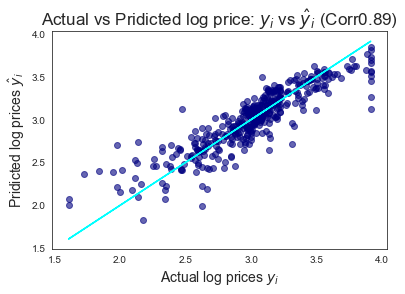

In [47]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
log_prices = np.log(data['Price'])
features = data.drop(['Price','INDUS','AGE'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features,log_prices,test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(x_train, y_train)

# Using Statsmodel
x_incl_const=sm.add_constant(x_train)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()

# finding Residuals by differnt ways
#residual=y_train-results.fittedvalues
#results.resid     # gives residuals

# Graph of Actual vs Pridicted Prices
corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('Actual log prices $y_i$',fontsize=14)
plt.ylabel('Pridicted log prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Pridicted log price: $y_i$ vs $\hat y_i$ (Corr{corr})',fontsize=17)
plt.show()

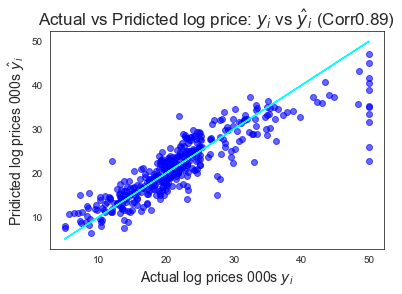

In [48]:
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,c='blue',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.xlabel('Actual log prices 000s $y_i$',fontsize=14)
plt.ylabel('Pridicted log prices 000s $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Pridicted log price: $y_i$ vs $\hat y_i$ (Corr{corr})',fontsize=17)
plt.show()

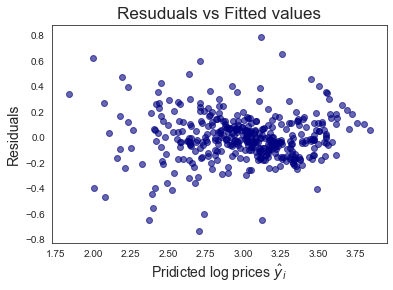

In [49]:
# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues,y=results.resid,c='navy',alpha=0.6)
plt.xlabel('Pridicted log prices $\hat y_i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Resuduals vs Fitted values',fontsize=17)
plt.show()

Text(0.5, 1.0, 'Log price model: residuals Skew (0.11775876201184944 Mean (-0.0))')

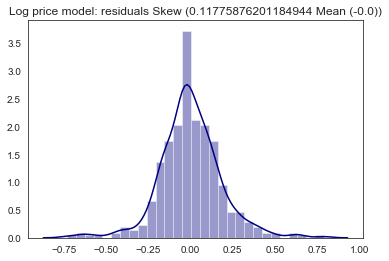

In [50]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean=round(results.resid.mean(),3)
resid_skew=results.resid.skew()

sb.distplot(results.resid,color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew} Mean ({resid_mean}))')

In [51]:
# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [52]:
# Challenge: Using the original model with all the features and normal prices generate:
# Plot of actual vs predicted prices (incl. correlation) using a different colour
# Plot of residuals vs. predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyse the results. 

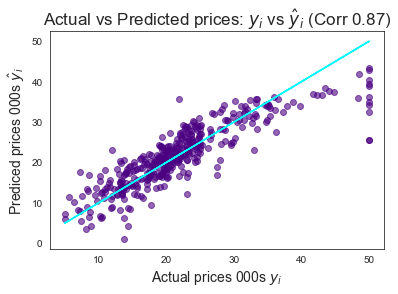

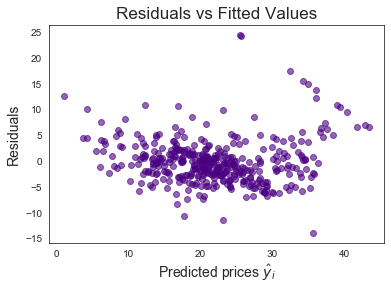

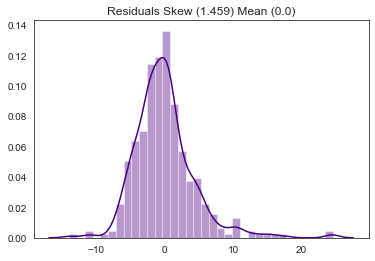

In [53]:
# Original model: normal prices & all features
prices = data['Price']
features = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sb.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

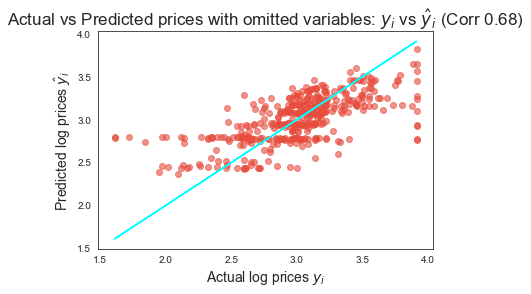

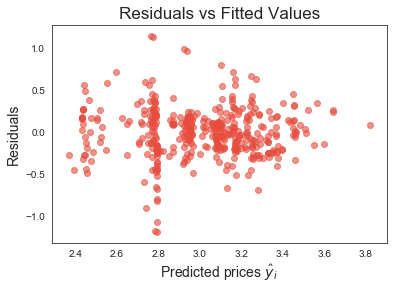

In [54]:
# Model Omitting Key Features using log prices
prices = np.log(data['Price'])
features = data.drop(['Price', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [55]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


In [56]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound=np.log(30)+np.sqrt(reduced_log_mse)          # since our data is in log and we want values in log so we convert  y(hat)=30000 to log  by taking log of 30000(30 bocoz it is reduced)- log(30)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)           # now converting log to 000's again to view data in $000's

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.5882802510008527
The upper bound in normal prices is $ 36171.81596176755
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [57]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 # Wrong! Add first. Transform afterwards. 

31453.778077746647

# Model Valuation

In [58]:
# Gather data 
#1. Independent dataframe
features = data.drop(['INDUS', 'AGE','Price'], axis=1)
#2. Dependent dataframe
log_prices = np.log(boston.target)
target = pd.DataFrame(log_prices, columns=['Price'])

In [63]:
# Creating templet of features
CRIME_IDX = 0
ZN_IDX = 1
CHAS_IDX = 2
RM_IDX = 4
PTRATIO_IDX = 8

# property_stats = np.ndarray(shape=(1, 11))
# property_stats[0][CRIME_IDX] = features['CRIM'].mean()
# property_stats[0][ZN_IDX] = features['ZN'].mean()
# property_stats[0][CHAS_IDX] = features['CHAS'].mean()

property_stats = features.mean().values.reshape(1, 11)

In [64]:
regr=LinearRegression().fit(features,target)
fitted_vals=regr.predict(features)

# Challenge: calculate the MSE and RMSE using sklearn
MSE=MSE = mean_squared_error(target, fitted_vals)
RMSE=np.sqrt(MSE)
RMSE

0.18751213519713034

In [65]:
def get_log_estimate(nr_rooms,
                    students_per_classroom,
                    next_to_river=False,
                    high_confidence=True):
    
    # Configure property
    property_stats[0][RM_IDX] = nr_rooms
    property_stats[0][PTRATIO_IDX] = students_per_classroom
    
    if next_to_river:
        property_stats[0][CHAS_IDX] = 1
    else:
        property_stats[0][CHAS_IDX] = 0
    
    # Make prediction
    log_estimate = regr.predict(property_stats)[0][0]
    
    # Calc Range 
    if high_confidence:
        upper_bound = log_estimate + 2*RMSE
        lower_bound = log_estimate - 2*RMSE
        interval = 95
    else:
        upper_bound = log_estimate + RMSE
        lower_bound = log_estimate - RMSE
        interval = 68
    
    return log_estimate, upper_bound, lower_bound, interval

In [66]:
get_log_estimate(3, 20, next_to_river=True, high_confidence=False)

(2.7767581914803996, 2.96427032667753, 2.5892460562832693, 68)

In [67]:
np.median(boston.target)

21.2

In [68]:
# Challenge: Write the python code that converts the log price estimate using 1970s prices
# as well as the upper and the lower bounds to today's prices. Round the values to the 
# nearest 1000 dollars. 

ZILLOW_MEDIAN_PRICE = 583.3
SCALE_FACTOR = ZILLOW_MEDIAN_PRICE / np.median(boston.target)

log_est, upper, lower, conf = get_log_estimate(9, students_per_classroom=15, 
                                              next_to_river=False, high_confidence=False)

# Convert to today's dollars
dollar_est = np.e**log_est * 1000 * SCALE_FACTOR
dollar_hi = np.e**upper * 1000 * SCALE_FACTOR
dollar_low = np.e**lower * 1000 * SCALE_FACTOR

# Round the dollar values to nearest thousand
rounded_est = np.around(dollar_est, -3)
rounded_hi = np.around(dollar_hi, -3)
rounded_low = np.around(dollar_low, -3)

print(f'The estimated property value is {rounded_est}.')
print(f'At {conf}% confidence the valuation range is')
print(f'USD {rounded_low} at the lower end to USD {rounded_hi} at the high end.')

The estimated property value is 827000.0.
At 68% confidence the valuation range is
USD 685000.0 at the lower end to USD 997000.0 at the high end.


In [69]:
def get_dollar_estimate(rm,ptratio,chas=False,large_range=True):
    
    """Estimate the price of a property in Boston.
    
    Keyword arguments:
    rm -- number of rooms in the property.
    ptratio -- number of students per teacher in the classroom for the school in the area.
    chas -- True if the property is next to the river, False otherwise.
    large_range -- True for a 95% prediction interval, False for a 68% interval.
    
    """
    if rm<1 or ptratio<1:
        print('That is unrealistic.Try again')
        return
    log_est, upper, lower, conf = get_log_estimate(rm, 
                                                   students_per_classroom=ptratio, 
                                                   next_to_river=chas, 
                                                   high_confidence=large_range)
    # Convert to today's dollars
    dollar_est=np.e**log_est*1000*SCALE_FACTOR
    dollar_hi=np.e**upper*1000*SCALE_FACTOR
    dollar_low=np.e*lower*1000*SCALE_FACTOR

    #Round the dollar values to nearest thousands
    rounded_est=np.around(dollar_est,-3)
    rounded_hi=np.around(dollar_hi,-3)
    rounded_low=np.around(dollar_low,-3)

    print(f'The estimated property value is {rounded_est}.')
    print(f'At {conf}% confidence the valuation range is')
    print(f'USD {rounded_low} at the lower end to USD {rounded_hi} at the high end.')

In [70]:
get_dollar_estimate(rm=6,ptratio=5,chas=True)

The estimated property value is 1017000.0.
At 95% confidence the valuation range is
USD 242000.0 at the lower end to USD 1480000.0 at the high end.
